## Exercises for Physical Models for Living Systems, week 2

Group members:
* Golan Rodrigo 1142802
* Zoppellari Elena 2076715

### Exercise 
SAR is a fundamental ecological quantity that explores the relationship between the area of a habitat or ecosystem and the number of species it can support whereas EAR focuses on the relationship between the geographic area of a region and the number of endemic species it contains. They are given by:
$$
SAR(a) = S(1-\sum_{n=1}^{\infty}(1-\alpha)^nP(n)) ,
$$
$$
EAR(a) = S \sum_{n=1}^{\infty}\alpha^nP(n) ,
$$
where $\alpha = a/A$ is the fraction of total area. The SAD is assumed to be the Log Series:
$$
P(n) = \frac{c(1-\nu)^n}{n} ,
$$
where $c=1/|log(\nu)|$ is the normalization constant and $\nu=b_0$. Hence the $SAR(a)$ and $EAR(a)$ become:
$$
SAR(a) = S(1+\frac{log(\alpha(1-\nu)+\nu)}{|log(\nu)|}) ,
$$
$$
EAR(a) = -\frac{S}{|log(\nu)|}log(1-\alpha(1-\nu)) .
$$
The SAR power law has the following expression:
$$
SAR_{pow}(a) = k a^z = A^zk \alpha^z .
$$
In order to confront it with the expression above, it is possible to consider $z \sim 0.25$ and $A^zk=S$ for consistency, because in this way when we consider the whole area ($a=A$, $\alpha = 1$) $SAR_{pow}(A)=SAR(A)=S$.

In addition, if we search the $\nu^*$ value such that $SAR(a) = SAR_{pow}(a)$ we find:
$$
1+\frac{log(\alpha(1-\nu^*)+\nu^*)}{|log(\nu^*)|} = \alpha^z
$$
Since the value of $\nu$ depends on $\alpha$, we will numerically solve the equation for 100 equally spaced values of $\alpha \in [0, 1]$, to obtain a range of $\nu$ values rounded to four decimal places. From this range, we will extrapolate the weighted mean as the best estimate for $\nu^*$.

C:\Users\ELENAZ~1\AppData\Local\Temp/ipykernel_7080/3676079873.py:6: RuntimeWarning: divide by zero encountered in log
  return 1 + np.log(alpha*(1-nu) + nu) / abs(np.log(nu)) - alpha**z
C:\Users\ELENAZ~1\AppData\Local\Temp/ipykernel_7080/3676079873.py:6: RuntimeWarning: invalid value encountered in true_divide
  return 1 + np.log(alpha*(1-nu) + nu) / abs(np.log(nu)) - alpha**z


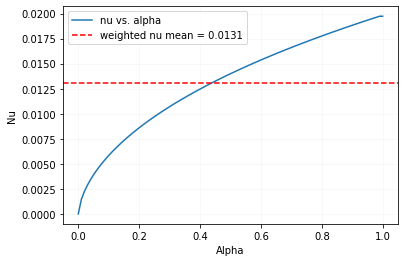

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def equation(nu, alpha, z):
    return 1 + np.log(alpha*(1-nu) + nu) / abs(np.log(nu)) - alpha**z

alpha_range = np.linspace(0.0, 1.0, 100)  

z = 0.25 
nu_values = [0]

for i, alpha in enumerate(alpha_range):
    initial_guess = nu_values[i]
    nu_solution = fsolve(equation, initial_guess, args=(alpha, z))
    nu_values.append(nu_solution[0])

nu_values.pop(0)
values, counts = np.unique(np.round(np.array(nu_values),4),return_counts=True)
weighted_list = [freq*x for x, freq in zip(values,counts)]
weighted_nu = round(sum(weighted_list)/len(nu_values),4)

plt.plot(alpha_range, nu_values, label='nu vs. alpha')
plt.axhline(weighted_nu, color='red', linestyle='--', label=f'weighted nu mean = {weighted_nu}')

plt.xlabel('Alpha')
plt.ylabel('Nu')
plt.legend()
plt.grid(alpha=0.1)

plt.show()

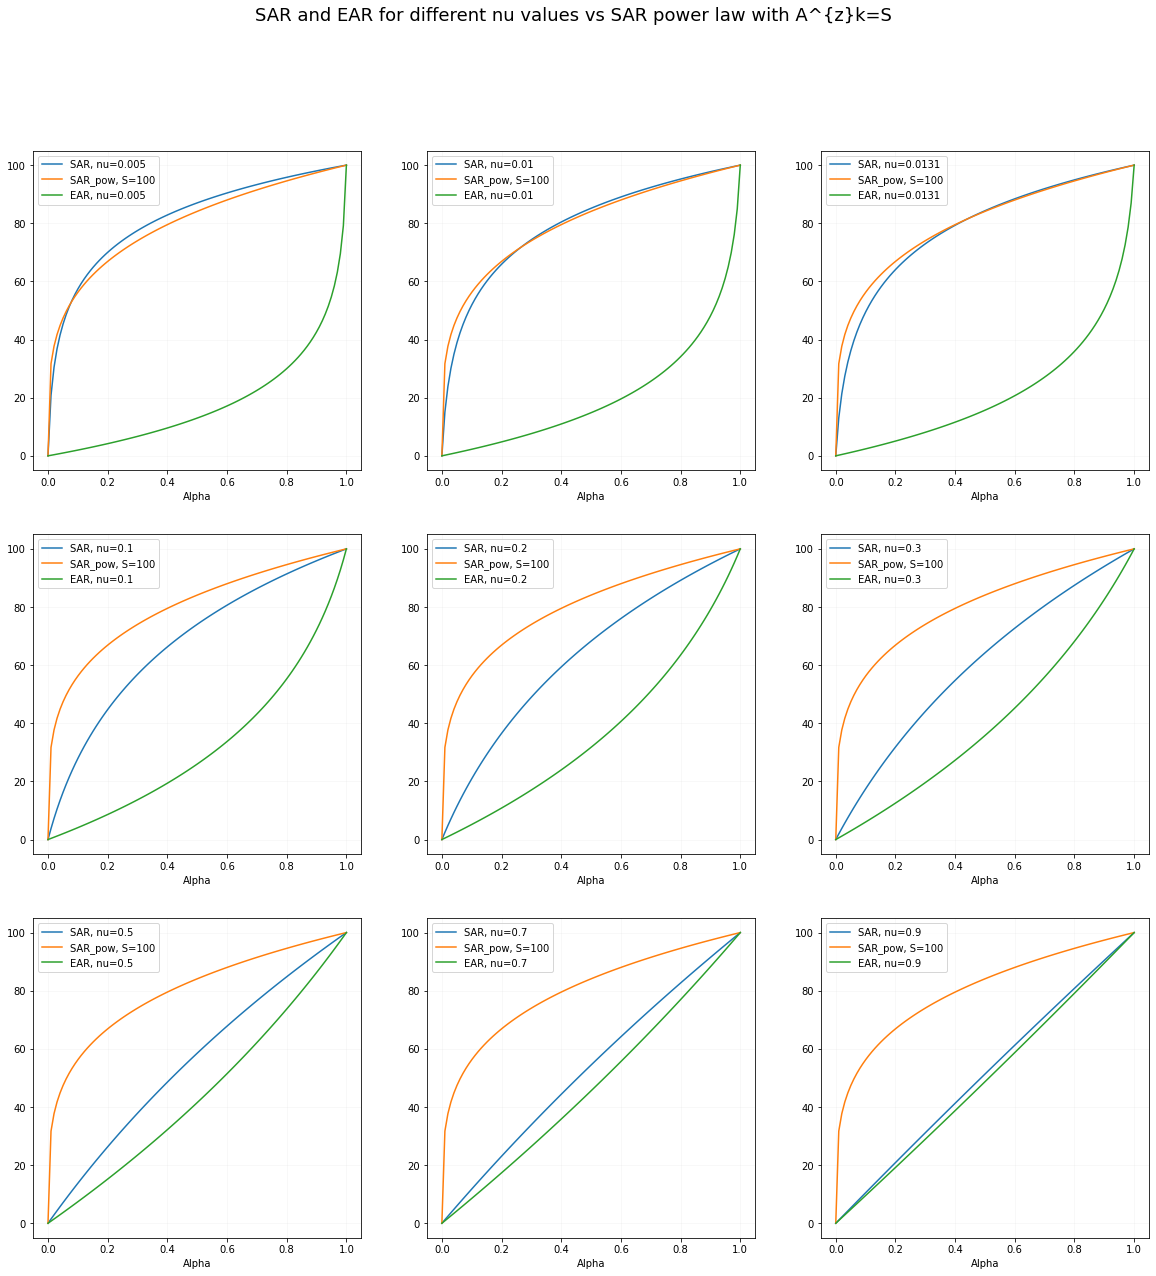

In [16]:
def SAR(a, S, nu):
    if 1-nu*(1-a.all())-a.all() > -1 and 1-nu*(1-a.all())-a.all() < 1 and nu*(1-a.all()) < 1 and nu*(1-a.all()) > -1:
        return S*(1+np.log(a*(1-nu)+nu)/abs(np.log(nu)))
    else:
        return np.zeros(shape=a.shape)

def EAR(a, S, nu):
    if 1-nu*(1-a.all())-a.all() > -1 and 1-nu*(1-a.all())-a.all() < 1 and nu*(1-a.all()) < 1 and nu*(1-a.all()) > -1:
        return -S/abs(np.log(nu))*np.log(1-a*(1-nu))
    else:
        return np.zeros(shape=a.shape)

def SAR_pow(a, k):
    return k*a**(z)

S = 100
k = S
nu_range = [0.005, 0.01, weighted_nu, 0.1,0.2,0.3,0.5,0.7,0.9]
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(20,20))
fig.suptitle('SAR and EAR for different nu values vs SAR power law with A^{z}k=S', fontsize=18)
for i, n in enumerate(nu_range):
    ax[i//3][i%3].plot(alpha_range, SAR(alpha_range, S, n),label="SAR, nu={}".format(n))
    ax[i//3][i%3].plot(alpha_range, SAR_pow(alpha_range, k),label="SAR_pow, S={}".format(k))
    ax[i//3][i%3].plot(alpha_range, EAR(alpha_range, S, n),label="EAR, nu={}".format(n))
    ax[i//3][i%3].set_xlabel("Alpha")
    ax[i//3][i%3].legend()
    ax[i//3][i%3].grid(alpha=0.1)

In the plots above we can observe that the value of $\nu$ determines how similar the shapes of the two $SAR(a)$ are. For values around $\nu \rightarrow 1$ the similarity is minimized  while for $\nu \sim 0.013$ is maximized, as expected, while it's worth noting that the superposition of the two curves is not perfect neither in this case, since $\nu \sim 0.013$ is estimated as the weighted average of $\nu$ and then expecially for smaller $\alpha$ values it does not correspond to the numerical solution. For $\nu \geq 1$ the convergence conditions of the sums $\sum_{n=1}^{\infty}(1-\alpha)^nP(n)$ and $\sum_{n=1}^{\infty}\alpha^nP(n)$ are not satified, however since $\nu = b_0$ this condition is always satisfied.